# Temporal Ordering of Alzheimer’s Biomarkers: Evidence from the TADPOLE Longitudinal Cohort
## Do amyloid, tau, and neurodegenerative biomarkers appear in a predictable sequence preceding cognitive decline?

The decision to focus on amyloid (A), tau (T), and neurodegeneration (N) biomarkers is based on the A/T/N Framework proposed by the National Institute on Aging and Alzheimer’s Association (NIA-AA, Jack et al., 2018).

These biomarkers follow the Alzheimer’s disease cascade:
(Amyloid deposition → Tau pathology → Neurodegeneration → Cognitive decline).

More details in the final report...

In [1]:
import pandas as pd
import numpy as np
import re #supports regular expressions (search, match, replace, etc.)

#### Create a datapath to make life easy

In [2]:
DATA_PATH = r"C:/Users/jdaly/OneDrive/Desktop/ISM645-Pred Analytics/TADPOLE/tadpole_challenge_201911210/tadpole_challenge/TADPOLE_D1_D2.csv"

#### Load the TADPOLE data, look at size/shape

In [3]:
df = pd.read_csv(DATA_PATH, low_memory=False) #It's a large dataset, but would like to keep datatype inference consistant
print("Shape of data: ",df.shape)

Shape of data:  (12741, 1907)


#### Preview the data

In [4]:
print("\n--- Preview of the first 5 rows ---")
display(df.head())


--- Preview of the first 5 rows ---


,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,,,,,,,,,,
1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,2005-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
2,3,011_S_0003,m06,11,1,0,ADNI1,ADNI1,2006-03-13,AD,...,,,,,,,,,,
3,3,011_S_0003,m12,11,1,0,ADNI1,ADNI1,2006-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
4,3,011_S_0003,m24,11,1,0,ADNI1,ADNI1,2007-09-12,AD,...,,,,,,,,,,


In [5]:
print("\n--- Dataset Information ---")
df.info()


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Columns: 1907 entries, RID to update_stamp_UPENNBIOMK9_04_19_17
dtypes: float64(72), int64(8), object(1827)
memory usage: 185.4+ MB


In [6]:
print("\n--- Data Types Summary ---")
print(df.dtypes.value_counts())


--- Data Types Summary ---
object     1827
float64      72
int64         8
dtype: int64


In [10]:
missing_ratio = df.isna().mean().sort_values(ascending=False)
print("\n--- Columns with Most Missing Data ---")
print(missing_ratio.head())


--- Top 10 Columns with Most Missing Data ---
PIB_bl           0.988541
PIB              0.982497
AV45             0.833765
FDG              0.736912
EcogSPOrgan      0.618711
EcogPtOrgan      0.614551
EcogSPDivatt     0.611333
MOCA             0.610156
EcogPtVisspat    0.608822
EcogPtDivatt     0.608665
dtype: float64


In [14]:
# Calculate missing percentage for each column
missing_percent = df.isna().mean() * 100

#Converting to dataframe and sort descending
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'MissingPercent']
missing_df = missing_df.sort_values(by='MissingPercent', ascending=False)
print(f"Total columns: {len(df.columns)}")
print("\n--- Top 50 columns with Most Missing Data ---")
display(missing_df.head(50))

print("\n--- Summary Stats ---")
print(missing_df.describe())

Total columns: 1907

--- Top 50 columns with Most Missing Data ---


,Column,MissingPercent
90,PIB_bl,98.854093
19,PIB,98.249745
20,AV45,83.376501
18,FDG,73.691233
42,EcogSPOrgan,61.871125
35,EcogPtOrgan,61.455145
43,EcogSPDivatt,61.133349
30,MOCA,61.015619
33,EcogPtVisspat,60.882191
36,EcogPtDivatt,60.866494



--- Summary Stats ---
       MissingPercent
count     1907.000000
mean         4.028187
std         10.206953
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.854093


In [16]:
#So many columns...moving this to a new CSV file for a full missing report.
missing_df.to_csv("missing_values_overview.csv", index=False)

#### Counting biomarkers vs. non-biomarker columns from the list of variables set to the CSV file

In [22]:
biomarker_candidate_cols = [col for col in df.columns if any (key in col.upper() for key in col.upper() 
                                                              for key in ['ABETA', 'TAU', 'PTAU','FDG', 'HIPP',
                                                                         'MMSE', 'ADAS', 'VENT', 'PIB', 'AV45',
                                                                         'VOLUME'])]
print(f"Biomarker Candidates: {len(biomarker_candidate_cols)}")
biomarker_candidate_cols[:15]



Biomarker Candidates: 293


['FDG',
 'PIB',
 'AV45',
 'ADAS11',
 'ADAS13',
 'MMSE',
 'Ventricles',
 'Hippocampus',
 'ADAS11_bl',
 'ADAS13_bl',
 'MMSE_bl',
 'Ventricles_bl',
 'Hippocampus_bl',
 'FDG_bl',
 'PIB_bl']

Jack CR Jr, Bennett DA, Blennow K, et al. (2018). NIA-AA Research Framework: Toward a biological definition of Alzheimer’s disease. Alzheimer's & Dementia.

This study adopts the A/T/N biomarker classification to structure analysis using the TADPOLE dataset, which contains longitudinal CSF, PET, MRI, and cognitive data from ADNI participants.

In [25]:
# Calculate missingness for each biomarker candidate and save to a CSV file for reference
biomarker_summary = pd.DataFrame(biomarker_candidate_cols, columns=['BiomarkerColumn'])
biomarker_summary['MissingPercent'] = biomarker_summary['BiomarkerColumn'].apply(lambda col: df[col].isna().mean() * 100)
biomarker_summary = biomarker_summary.sort_values(by='MissingPercent', ascending=False)
biomarker_summary.to_csv('biomarker_candidates_with_missingness.csv', index=False)

### Why these biomarkers?/Data quality and dealing with missing data
Biomarker selection was not arbitrary. I used the accepted A/T/N research framework for Alzheimer's disease (Jack et al., 2018), which classifies biomarkers as:

| Biomarker Type | Biological Process                   | Examples in Dataset |
|----------------|---------------------------------------|----------------------|
| **A (Amyloid)** | Amyloid beta deposition              | ABETA, AV45, PIB     |
| **T (Tau)**     | Aggregated tau pathology             | TAU, PTAU            |
| **N (Neurodegeneration)** | Neuronal injury or brain atrophy | FDG-PET, HippocampalVol, Ventricles, MRI metrics |

Based on this framework, I programmatically selected all columns containing these biomarker names, avoiding bias.


In [27]:
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [31]:
Miss_threshold = 30.0 #percent
bio_summary = missing_df[missing_df['Column'].isin(biomarker_candidate_cols)].copy()
bio_summary = bio_summary.merge(pd.DataFrame({'Column': biomarker_candidate_cols}), on='Column', how='right').fillna(0)
bio_summary = bio_summary.sort_values('MissingPercent', ascending=False)

print("Candidates (count)", len(bio_summary))
print("\nTop candidate missingness")
display(bio_summary.head(25))

Candidates (count) 293

Top candidate missingness


,Column,MissingPercent
14,PIB_bl,98.854093
1,PIB,98.249745
2,AV45,83.376501
0,FDG,73.691233
15,AV45_bl,54.870104
7,Hippocampus,46.613296
6,Ventricles,41.566596
4,ADAS13,30.743270
3,ADAS11,30.068283
5,MMSE,29.895613


In [32]:
filtered_biomarkers = bio_summary[bio_summary['MissingPercent'] < Miss_threshold]['Column'].tolist()
print(f"\nKeeping {len(filtered_biomarkers)} biomarkers with missingness < {Miss_threshold}%")
display(filtered_biomarkers)


Keeping 284 biomarkers with missingness < 30.0%


['MMSE',
 'FDG_bl',
 'PLSFDG01_BAIPETNMRC_09_12_16',
 'Hippocampus_bl',
 'HIPPL01_BAIPETNMRC_09_12_16',
 'NL1HIPP_BAIPETNMRC_09_12_16',
 'HIPPR06_BAIPETNMRC_09_12_16',
 'HIPPL06_BAIPETNMRC_09_12_16',
 'HIPPR01_BAIPETNMRC_09_12_16',
 'VENTRICLE_5TH_SIZE_UCBERKELEYAV45_10_17_16',
 'VENTRICLE_5TH_UCBERKELEYAV45_10_17_16',
 'VENTQC_UCSFFSL_02_01_16_UCSFFSL51ALL_08_01_16',
 'Ventricles_bl',
 'ADAS13_bl',
 'VENTQC_UCSFFSX_11_02_15_UCSFFSX51_08_01_16',
 'ADAS11_bl',
 'RIGHT_VESSEL_SIZE_UCBERKELEYAV45_10_17_16',
 'RIGHT_VESSEL_UCBERKELEYAV45_10_17_16',
 'LEFT_VESSEL_SIZE_UCBERKELEYAV45_10_17_16',
 'LEFT_VESSEL_UCBERKELEYAV45_10_17_16',
 'PTAU_UPENNBIOMK9_04_19_17',
 'TAU_UPENNBIOMK9_04_19_17',
 'ABETA_UPENNBIOMK9_04_19_17',
 'CTX_RH_ROSTRALANTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
 'CTX_LH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV45_10_17_16',
 'CTX_LH_PARAHIPPOCAMPAL_UCBERKELEYAV45_10_17_16',
 'CTX_RH_ROSTRALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
 'LEFT_CAUDATE_UCBERKELEYAV45_10_17_16',
 

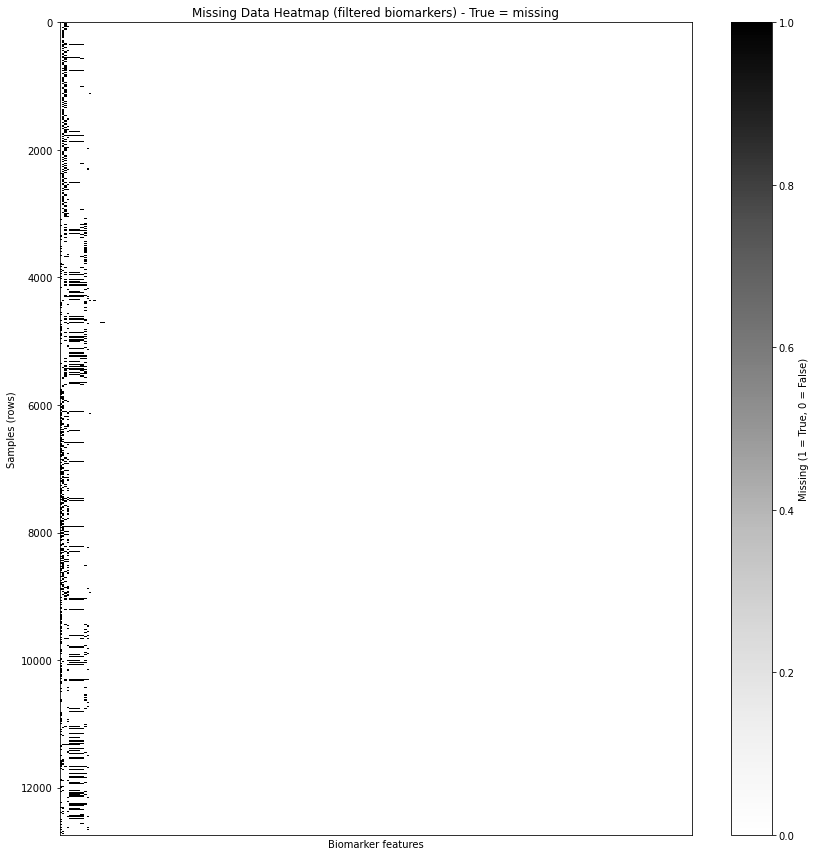

In [36]:
fb = filtered_biomarkers
if len(fb) == 0:
    print("No biomarkers passed the threshold, consider adjusting the threshold...")
else:
    sub = df[fb]
    arr = sub.isnull().to_numpy()
    plt.figure(figsize=(12, max(3, min(0.02*sub.shape[0], 12))))
    plt.imshow(arr, aspect='auto', cmap='Greys', interpolation='nearest')
    plt.title("Missing Data Heatmap (filtered biomarkers) - True = missing")
    if sub.shape[1] <= 40:
        plt.xticks(range(sub.shape[1]), sub.columns, rotation=90, fontsize=8)
    else:
        plt.xticks([])
    plt.ylabel("Samples (rows)")
    plt.xlabel("Biomarker features")
    plt.colorbar(label='Missing (1 = True, 0 = False)')
    plt.tight_layout()
    plt.show()

In [38]:
#Preparing numeric biomarker dataframe for imputation
numeric_biomarkers = [c for c in filtered_biomarkers if pd.api.types.is_numeric_dtype(df[c])]
print("Numeric biomarkers available for imputation:", len(numeric_biomarkers))
display(numeric_biomarkers)
bio_num = df[numeric_biomarkers].copy()
print("\nColumn missingness (numeric biomarkers):")
display(bio_num.isna().mean().sort_values(ascending=False).round(3).head(25))

Numeric biomarkers available for imputation: 7


['MMSE',
 'FDG_bl',
 'Hippocampus_bl',
 'Ventricles_bl',
 'ADAS13_bl',
 'ADAS11_bl',
 'MMSE_bl']


Column missingness (numeric biomarkers):


MMSE              0.299
FDG_bl            0.283
Hippocampus_bl    0.140
Ventricles_bl     0.038
ADAS13_bl         0.006
ADAS11_bl         0.001
MMSE_bl           0.000
dtype: float64

## Why use `StandardScaler` and `KNNImputer`?

The combination of `StandardScaler` and `KNNImputer` from *scikit-learn* allows for multivariate, biologically informed imputation.

## `StandardScaler()`
**Purpose:** Normalize numeric biomarker values before imputation.

- Biomarkers like **CSF_TAU**, **ABETA**, and **Hippocampal volume** are measured on very different scales (e.g., pg/mL vs mm³).
- KNN calculates distances between rows (patients). Without scaling, large-range variables dominate the distance metric.
- `StandardScaler` standardizes each feature to zero mean and unit variance so that all biomarkers contribute equally:
  
  \[
  z = \frac{x - \mu}{\sigma}
  \]

---

## `KNNImputer(n_neighbors=5)`
**Purpose:** Estimate missing values using patterns from the *K* most similar patients.

- For each missing value, the imputer identifies the **5 nearest neighbors** based on all other biomarker values.
- The missing value is replaced by the **mean** (or weighted mean) of those neighbors.
- This preserves the multivariate structure of the data — crucial when biomarkers are correlated (e.g., **low amyloid** often co-occurs with **high tau**).

---

##  Comparison to Median Imputation

| Method | Pros | Cons |
|--------|------|------|
| **Median** | Fast, robust to outliers, easy to interpret | Ignores correlations between biomarkers |
| **KNN (with scaling)** | Uses multivariate relationships, biologically meaningful | Slower, sensitive to feature scaling and outliers |

---

##  Interpretation in AD Context
In Alzheimer’s research, biomarkers such as **ABETA**, **TAU**, **PTAU**, and **Hippocampal volume** form correlated cascades.  
KNN imputation helps ensure that estimated values follow realistic patterns along this cascade — unlike median imputation, which treats each biomarker independently.

Median-imputed missing per column (this value should be zero now):


MMSE              0
FDG_bl            0
Hippocampus_bl    0
Ventricles_bl     0
ADAS13_bl         0
ADAS11_bl         0
MMSE_bl           0
dtype: int64

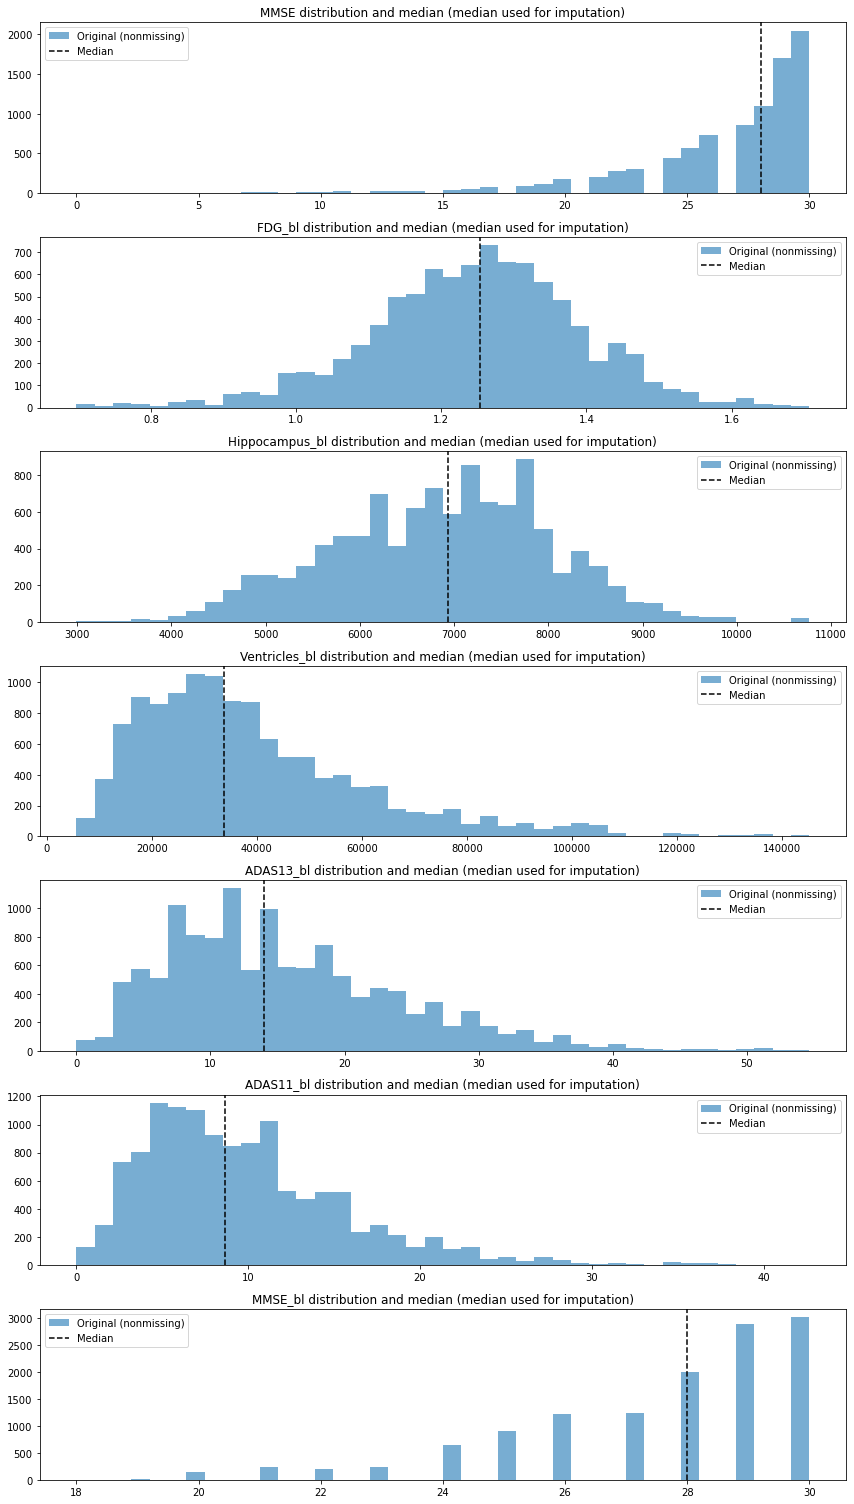

In [44]:
#Imputing by median values
bio_median = bio_num.copy()
medians = bio_median.median()
bio_median = bio_median.fillna(medians)
print("Median-imputed missing per column (this value should be zero now):")
display(bio_median.isna().sum().head(25))

example_vars = numeric_biomarkers[:]
if len(example_vars) > 0:
    plt.figure(figsize=(12, 3*len(example_vars)))
    for i, v in enumerate(example_vars, 1):
        plt.subplot(len(example_vars), 1, i)
        plt.hist(bio_num[v].dropna(), bins=40, alpha=0.6, label='Original (nonmissing)')
        plt.axvline(medians[v], color='k', linestyle='--', label='Median')
        plt.title(f"{v} distribution and median (median used for imputation)")
        plt.legend()
    plt.tight_layout()
    plt.show()

KNN imputation done. NaNs left: 0


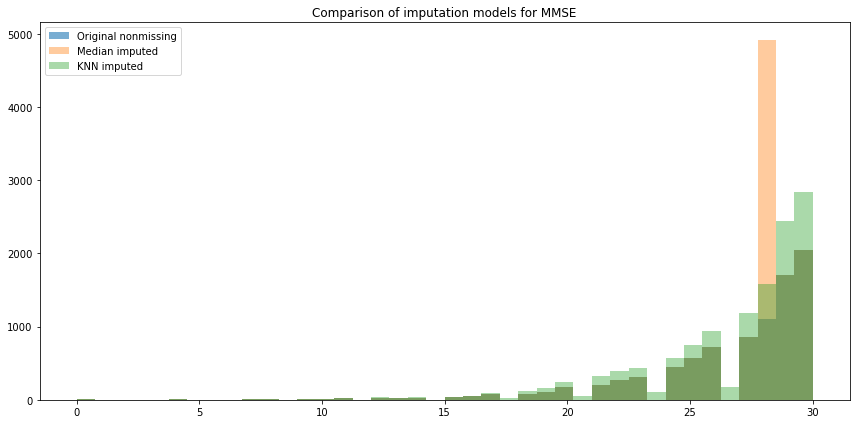

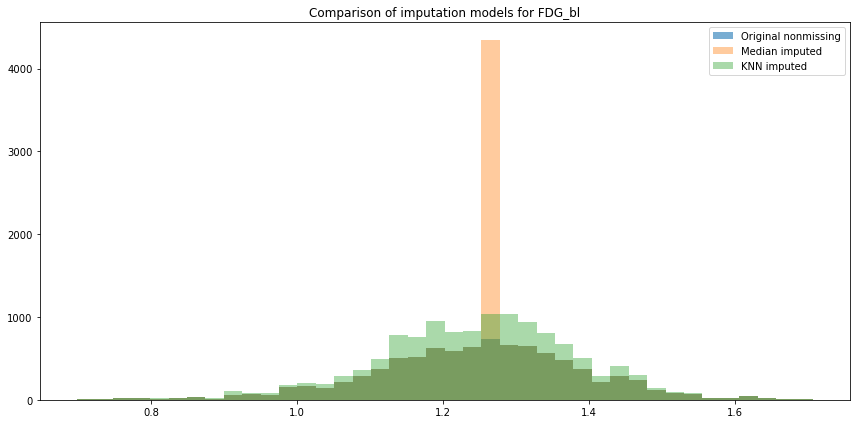

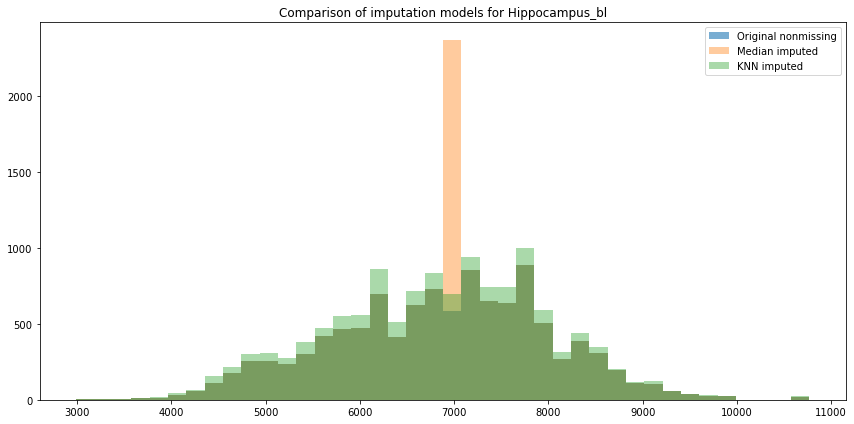

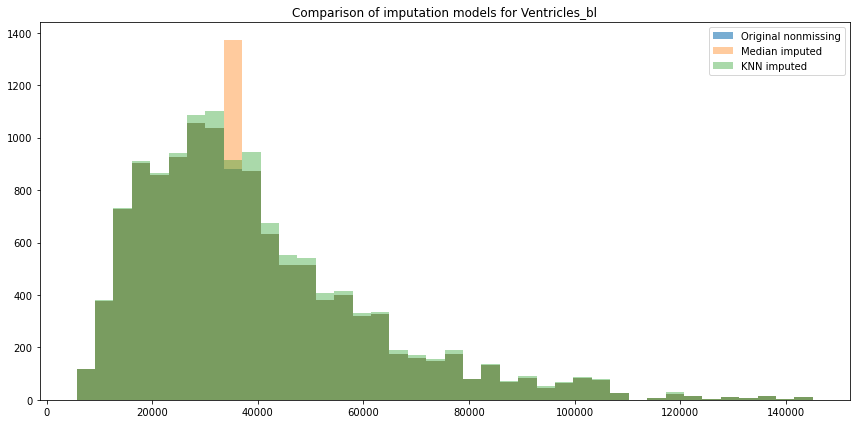

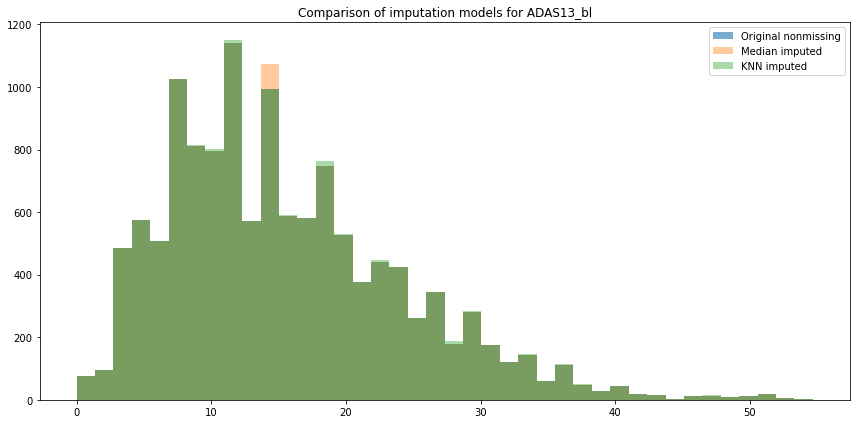

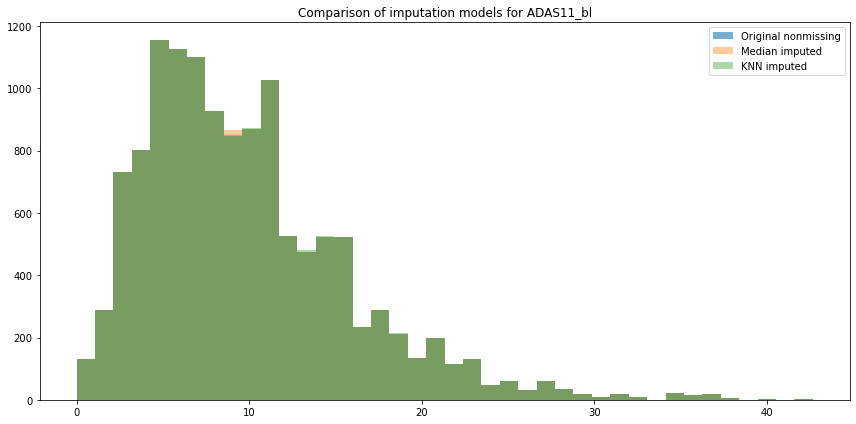

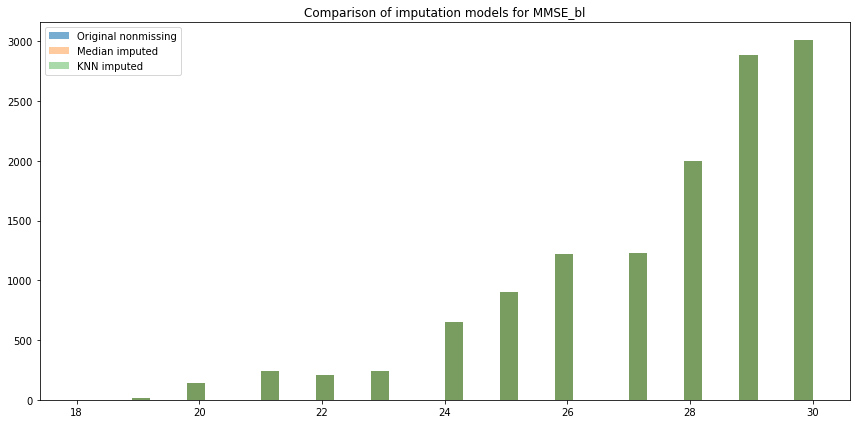

In [60]:
#KNN imputations (k=5) on standardized data
if bio_num.shape[1] > 0:
    scaler = StandardScaler()
    bio_scaled = pd.DataFrame(scaler.fit_transform(bio_num), columns=bio_num.columns, index=bio_num.index)
    imputer = KNNImputer(n_neighbors=5)
    knn_imputed_array = imputer.fit_transform(bio_scaled)
    knn_imputed_scaled = pd.DataFrame(knn_imputed_array, columns=bio_num.columns, index=bio_num.index)
    bio_knn = pd.DataFrame(scaler.inverse_transform(knn_imputed_scaled), columns=bio_num.columns, index=bio_num.index)
    print("KNN imputation done. NaNs left:", bio_knn.isna().sum().sum())
    if len(example_vars) > 0:
            v = example_vars[0]
            for i, v in enumerate(example_vars, 1):
                plt.figure(figsize=(12, 6))
                plt.hist(bio_num[v].dropna(), bins=40, alpha=0.6, label='Original nonmissing')
                plt.hist(bio_median[v], bins=40, alpha=0.4, label='Median imputed')
                plt.hist(bio_knn[v], bins=40, alpha=0.4, label='KNN imputed')
                plt.title(f"Comparison of imputation models for {v}")
                plt.tight_layout()
                plt.legend()
                plt.show()
else:
    print("No numeric biomarkers to impute...")  

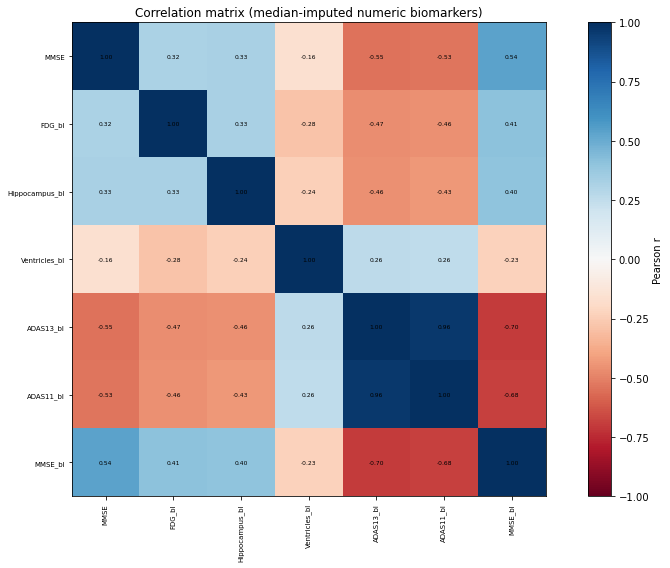

In [62]:
if 'bio_median' in globals() and bio_median.shape[1] > 0:
    corr = bio_median.corr()
    plt.figure(figsize=(12,8))
    plt.imshow(corr.values, interpolation='nearest', cmap='RdBu', vmin=-1, vmax=1)
    plt.colorbar(label='Pearson r')
    plt.title("Correlation matrix (median-imputed numeric biomarkers)")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=7)
    plt.yticks(range(len(corr.index)), corr.index, fontsize=7)
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            plt.text(j, i, f"{corr.values[i,j]:.2f}", ha='center', va='center', fontsize=6)
    plt.tight_layout()
    plt.show()
else:
    print('No median-imputed biomarker data available for correlation heatmap.')

### Median imputation will be used as a baseline approach to fill missing biomarker values due to its robustness and simplicity. To assess the stability of downstream analyses, I additionally applied KNN imputation (k=5) previously on standardized features to leverage multivariate dependencies among biomarkers. Comparison between the two imputations allowed me to evaluate whether the results were sensitive to imputation strategy.